In [1]:
# 1. Setup and Data Loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization styles
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# Load the dataset
try:
    df = pd.read_csv("AB_NYC_2019.csv")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: The file 'AB_NYC_2019.csv' was not found. Please ensure the file is in the correct directory.")
    exit()

Dataset loaded successfully.


In [3]:
# 2. Initial Data Inspection
print("\n--- Initial Data Inspection (Head) ---")
print(df.head())

print("\n--- Data Information (Info) ---")
df.info()

print("\n--- Descriptive Statistics ---")
print(df.describe(include='all'))


--- Initial Data Inspection (Head) ---
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    14

In [4]:
# 3. Data Cleaning and Missing Value Handling

print("\n--- Missing Values Check ---")
print(df.isnull().sum())

# Dropping 'id', 'host_name', and 'last_review' as they are not crucial for core analysis
# 'id' is a unique identifier, 'host_name' has too many unique values, 'last_review' is partially covered by 'reviews_per_month'.
df.drop(['id', 'host_name', 'last_review'], axis=1, inplace=True)

# Impute missing values in 'reviews_per_month' with 0, assuming missing means no reviews
df['reviews_per_month'].fillna(0, inplace=True)

print("\n--- Missing Values After Cleaning ---")
print(df.isnull().sum())
print("Remaining rows:", len(df))


--- Missing Values Check ---
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

--- Missing Values After Cleaning ---
name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price              


--- Price Distribution Before Outlier Handling ---


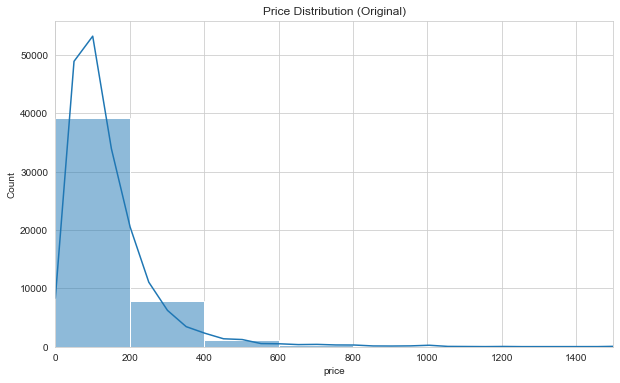


--- Price Distribution After Outlier Handling ---


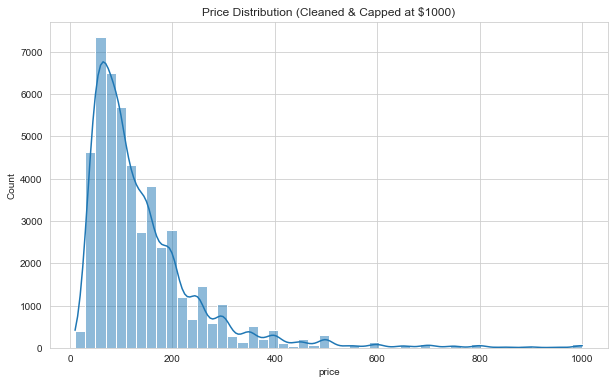

In [5]:
# 4. Outlier Detection and Handling (Focus on 'price')

print("\n--- Price Distribution Before Outlier Handling ---")
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution (Original)')
plt.xlim(0, 1500) # Limit x-axis for better visual representation
plt.show()

# Removing listings with price = 0 (unrealistic)
df = df[df['price'] > 0]

# Handling extreme outliers using the IQR method (for a robust approach)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Remove values above the upper bound and also extremely high prices (e.g., above $1000)
# A more restrictive cap for visualization and practical analysis is often preferred
price_cap = 1000
df_cleaned = df[df['price'] <= price_cap]

print("\n--- Price Distribution After Outlier Handling ---")
sns.histplot(df_cleaned['price'], bins=50, kde=True)
plt.title('Price Distribution (Cleaned & Capped at $1000)')
plt.show()

# Re-assign the cleaned DataFrame
df = df_cleaned


--- Distribution of 'neighbourhood_group' ---


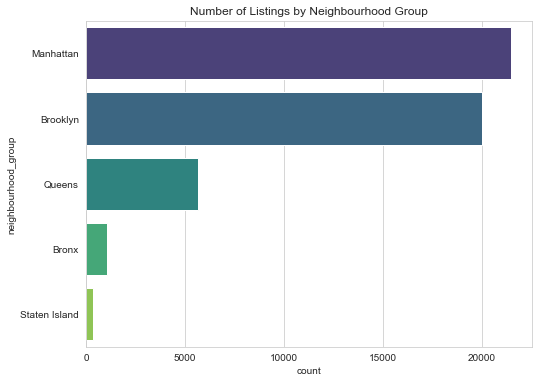


--- Distribution of 'room_type' ---


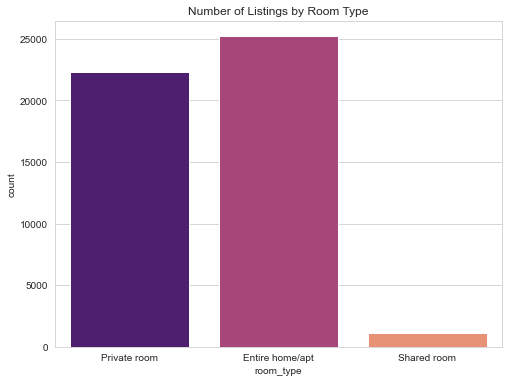

In [6]:
# 5. Univariate Analysis (Categorical Variables)

print("\n--- Distribution of 'neighbourhood_group' ---")
plt.figure(figsize=(8, 6))
sns.countplot(y='neighbourhood_group', data=df, order=df['neighbourhood_group'].value_counts().index, palette='viridis')
plt.title('Number of Listings by Neighbourhood Group')
plt.show()

print("\n--- Distribution of 'room_type' ---")
plt.figure(figsize=(8, 6))
sns.countplot(x='room_type', data=df, palette='magma')
plt.title('Number of Listings by Room Type')
plt.show()


--- Price Distribution by Neighbourhood Group ---


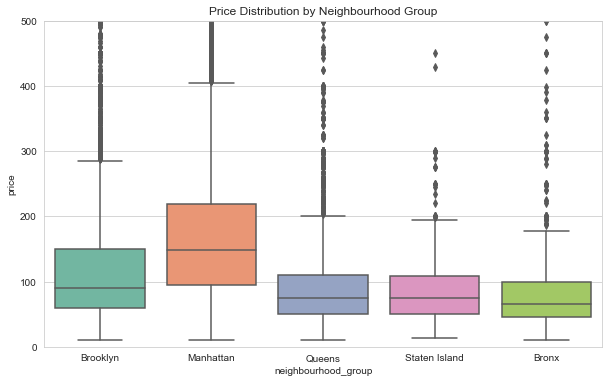


--- Price Distribution by Room Type ---


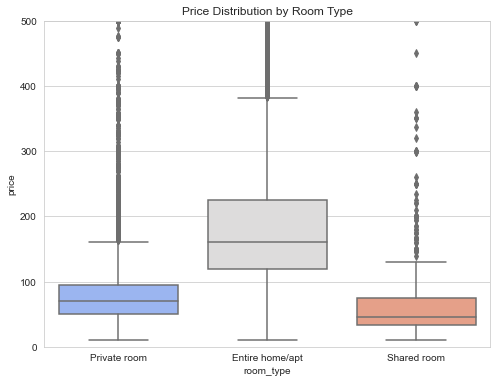


--- Average Number of Reviews by Neighbourhood Group ---


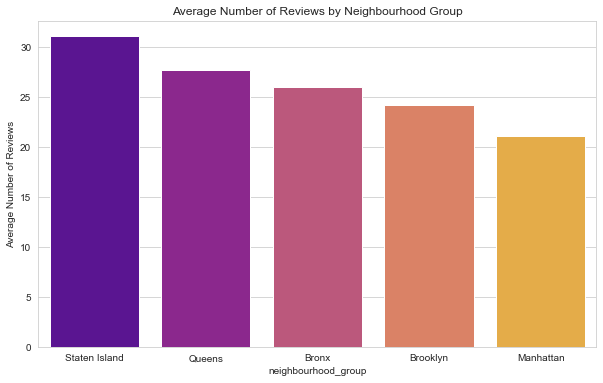

In [7]:
# 6. Bivariate Analysis and Key Insights

# Insight 1: Price vs. Neighbourhood Group
print("\n--- Price Distribution by Neighbourhood Group ---")
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=df, palette='Set2')
plt.title('Price Distribution by Neighbourhood Group')
plt.ylim(0, 500) # Limiting y for better visualization
plt.show()

# Insight 2: Price vs. Room Type
print("\n--- Price Distribution by Room Type ---")
plt.figure(figsize=(8, 6))
sns.boxplot(x='room_type', y='price', data=df, palette='coolwarm')
plt.title('Price Distribution by Room Type')
plt.ylim(0, 500)
plt.show()

# Insight 3: Number of Reviews vs. Neighbourhood Group
print("\n--- Average Number of Reviews by Neighbourhood Group ---")
reviews_by_group = df.groupby('neighbourhood_group')['number_of_reviews'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=reviews_by_group.index, y=reviews_by_group.values, palette='plasma')
plt.title('Average Number of Reviews by Neighbourhood Group')
plt.ylabel('Average Number of Reviews')
plt.show()


--- Correlation Heatmap of Numerical Features ---


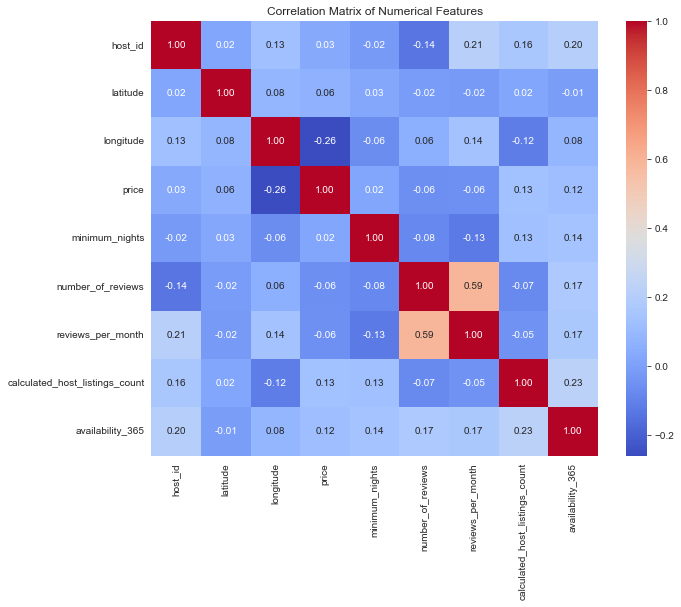

In [8]:
# 7. Correlation Analysis

print("\n--- Correlation Heatmap of Numerical Features ---")
# Select only numerical columns
numerical_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


--- Geo-Spatial Distribution of Listings (Sampled) ---


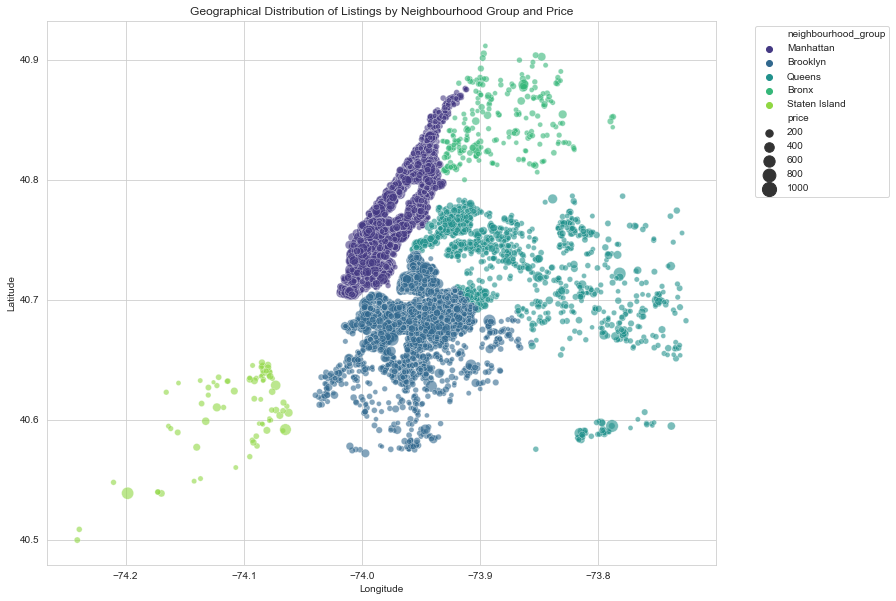


--- EDA Complete ---
Final dataset size: 48645 rows.


In [9]:
# 8. Geo-Spatial Analysis (Scatter Plot with Lat/Long)
print("\n--- Geo-Spatial Distribution of Listings (Sampled) ---")
# Sampling for faster rendering and clearer plot for a large dataset
df_sample = df.sample(n=10000, random_state=42)
plt.figure(figsize=(12, 10))
# Using price as color and a small alpha for better visibility of density
sns.scatterplot(
    x='longitude',
    y='latitude',
    hue='neighbourhood_group',
    size='price',
    data=df_sample,
    palette='viridis',
    alpha=0.6,
    sizes=(20, 200)
)
plt.title('Geographical Distribution of Listings by Neighbourhood Group and Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

print("\n--- EDA Complete ---")
print(f"Final dataset size: {len(df)} rows.")